In [35]:
import numpy as np
import requests 
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
data_set_url = "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977"
resp = requests.get(data_set_url)

soup = BeautifulSoup(resp.text, "html.parser")
print(f"soup req: {soup}")

download_url = None
for a_tag in soup.find_all("a", href=True):
    if 'download' in a_tag.text.lower():
        download_url = f"https://www.kaggle.com{a_tag['href']}"
        break

if not download_url:
    raise Exception("Download link not found")

csv_response = requests.get(download_url, stream=True)

with open("data_set.csv", "wb") as file:
    for chunk in csv_response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)

print(f"Dataset Downloaded as {file}")


In [36]:
from pathlib import Path
filename = Path("/home/sina/projects/ml-predictor/src/notebooks/StudentsPerformance.xls")
df = pd.read_csv(filename)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
df.shape

(1000, 8)

In [38]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [39]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [43]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [44]:
print(df['gender'].unique())
print(df['lunch'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['test preparation course'].unique())


['female' 'male']
['standard' 'free/reduced']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['none' 'completed']


In [45]:
print("successfull") if df['gender'].dtype == "O" else " failure"

successfull


In [46]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [47]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [48]:
df.rename(
    columns={
        'math score': 'math_score',
        'reading score': 'reading_score',
        'writing score': 'writing_score',
    }, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [49]:

df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [50]:
df['average_score'] = df['total_score'] / 3

In [56]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [61]:
complete_reading_score = df.loc[df['reading_score'] == 100]['gender'].count()
complete_writing_score = df.loc[df['writing_score'] == 100]['gender'].count()
complete_math_score = df.loc[df['math_score'] == 100]['gender'].count()

print(complete_reading_score, complete_writing_score, complete_math_score)

17 14 7


In [64]:
less_than_20_reading_score = df.loc[df['reading_score'] <= 20]['gender'].count()
less_than_20_writing_score = df.loc[df['writing_score'] <= 20]['gender'].count()
less_than_20_math_score = df.loc[df['math_score'] <= 20]['gender'].count()

print(less_than_20_reading_score, less_than_20_writing_score, less_than_20_math_score)

1 3 4


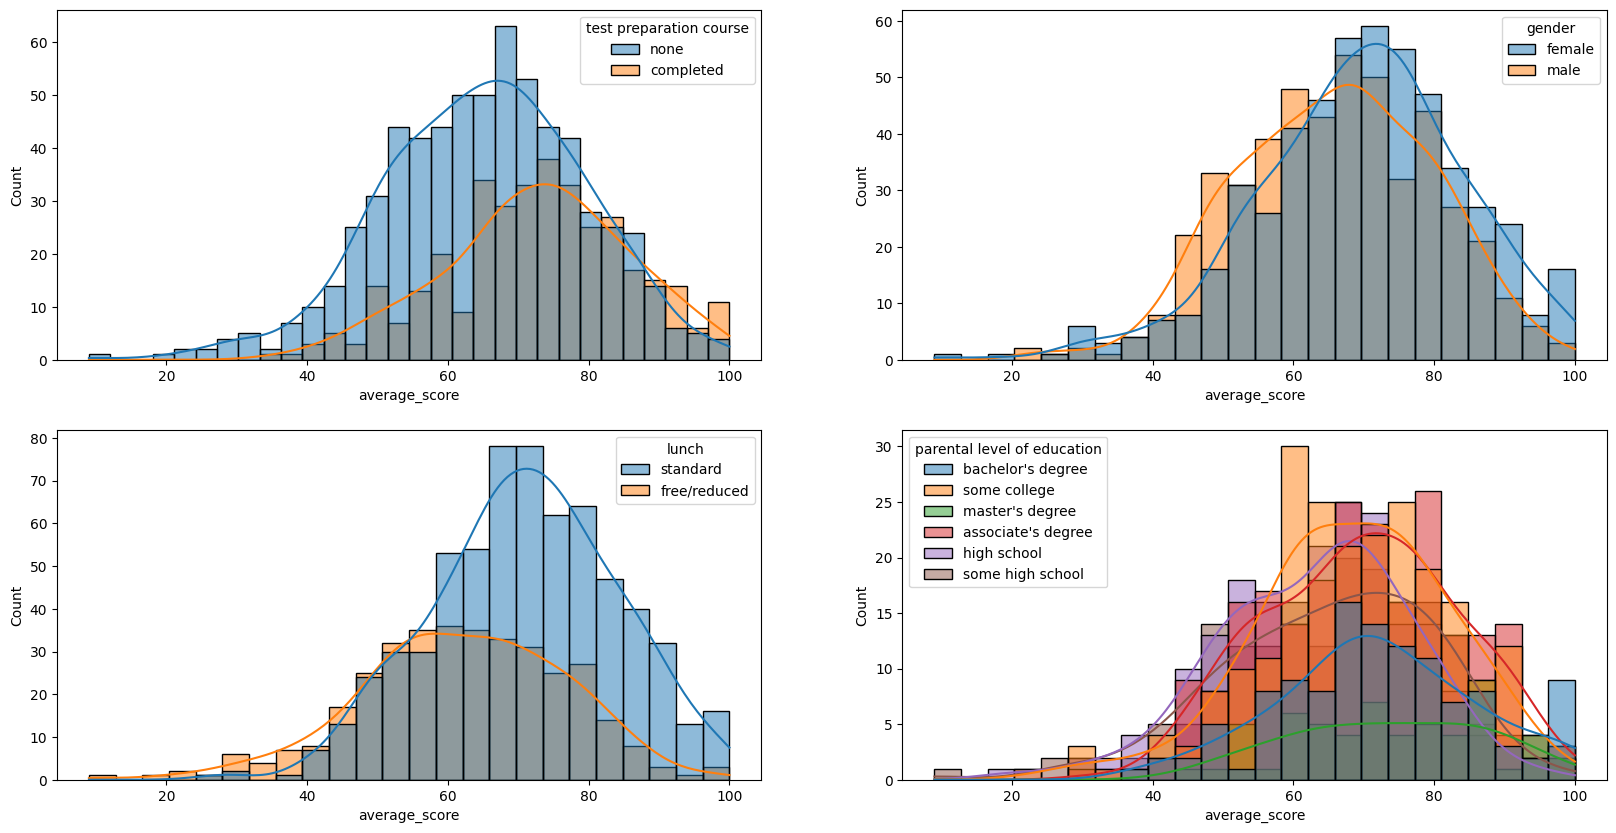

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, 2, figsize=(20,10))

plt.subplot(221)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='test preparation course')

plt.subplot(222)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')

plt.subplot(223)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')


plt.subplot(224)
sns.histplot(data=df, x='average_score', kde=True, hue='parental level of education')

plt.show()

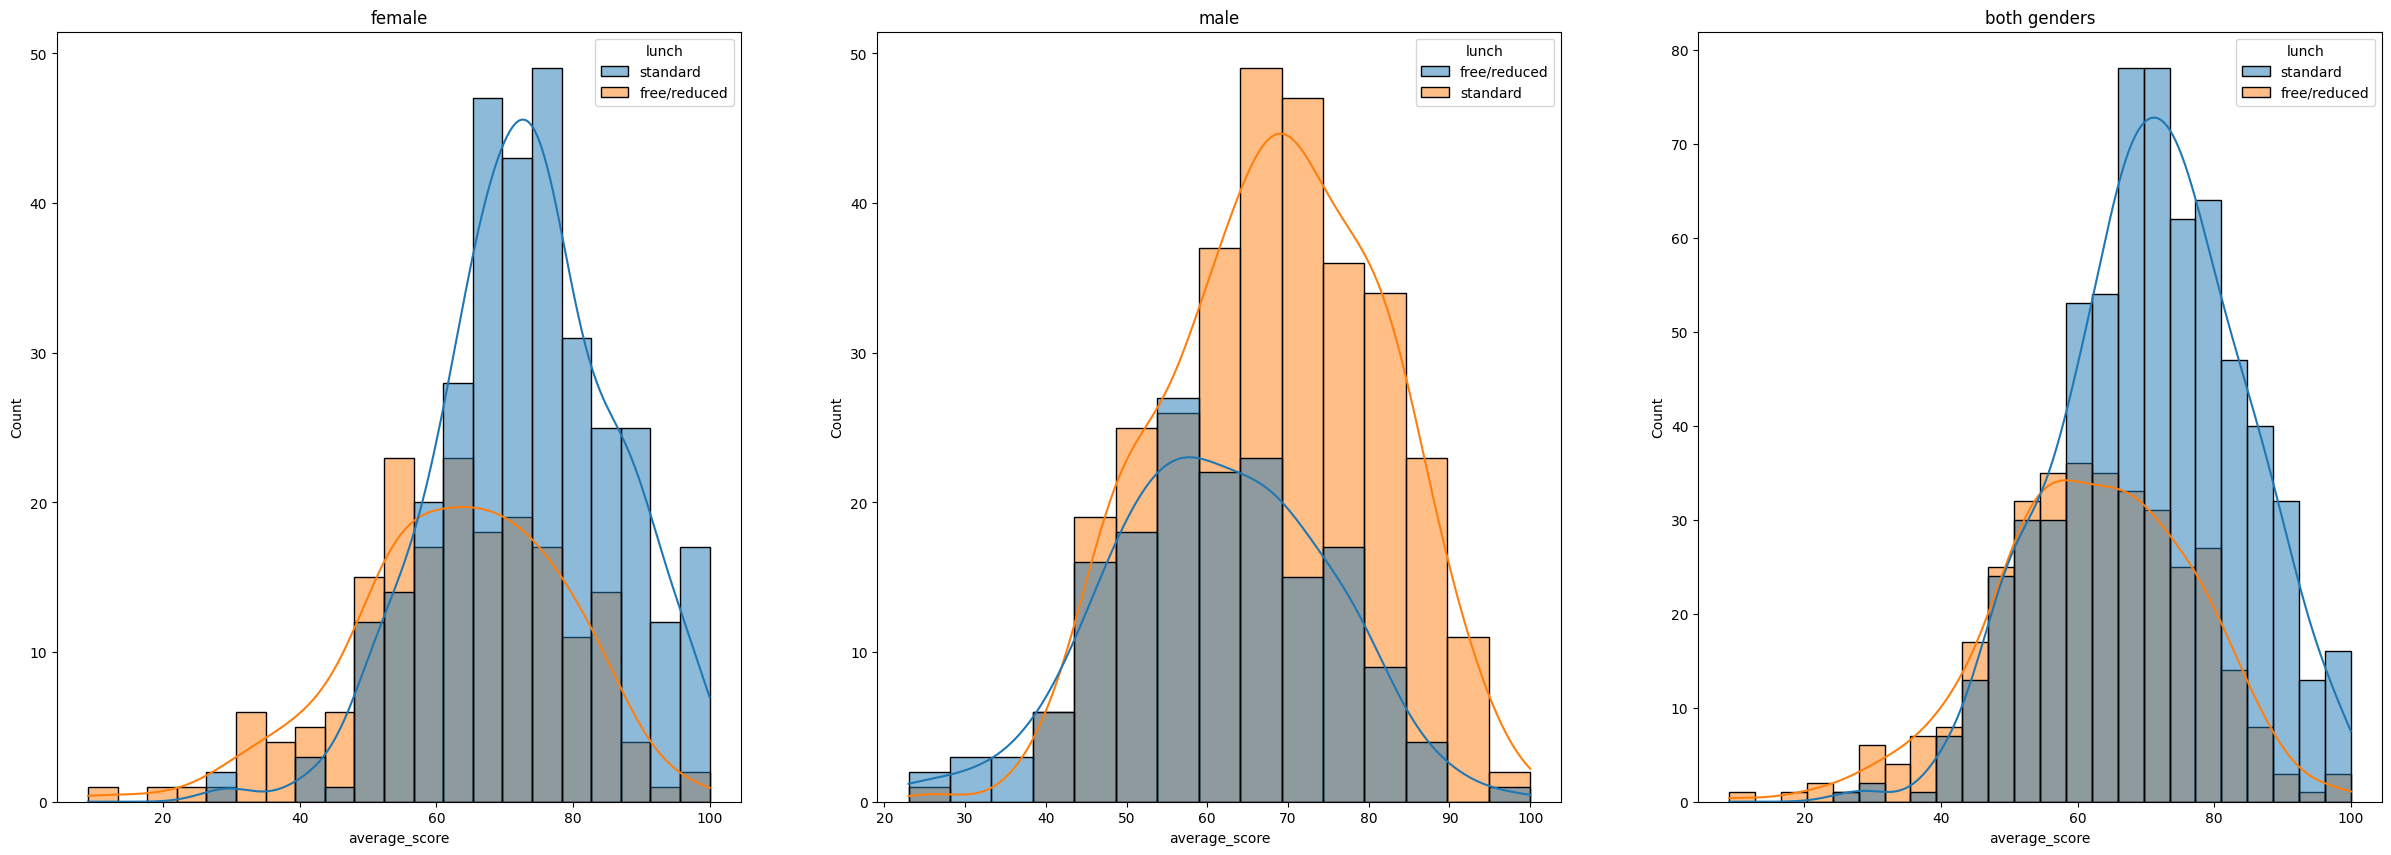

In [120]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, color='blue', hue='lunch')
ax[0].set_title('female')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, color='black', hue='lunch')
ax[1].set_title('male')
plt.subplot(133)
sns.histplot(data=df, kde=True, color='d', x='average_score', hue='lunch')
ax[2].set_title('both genders')
plt.show()

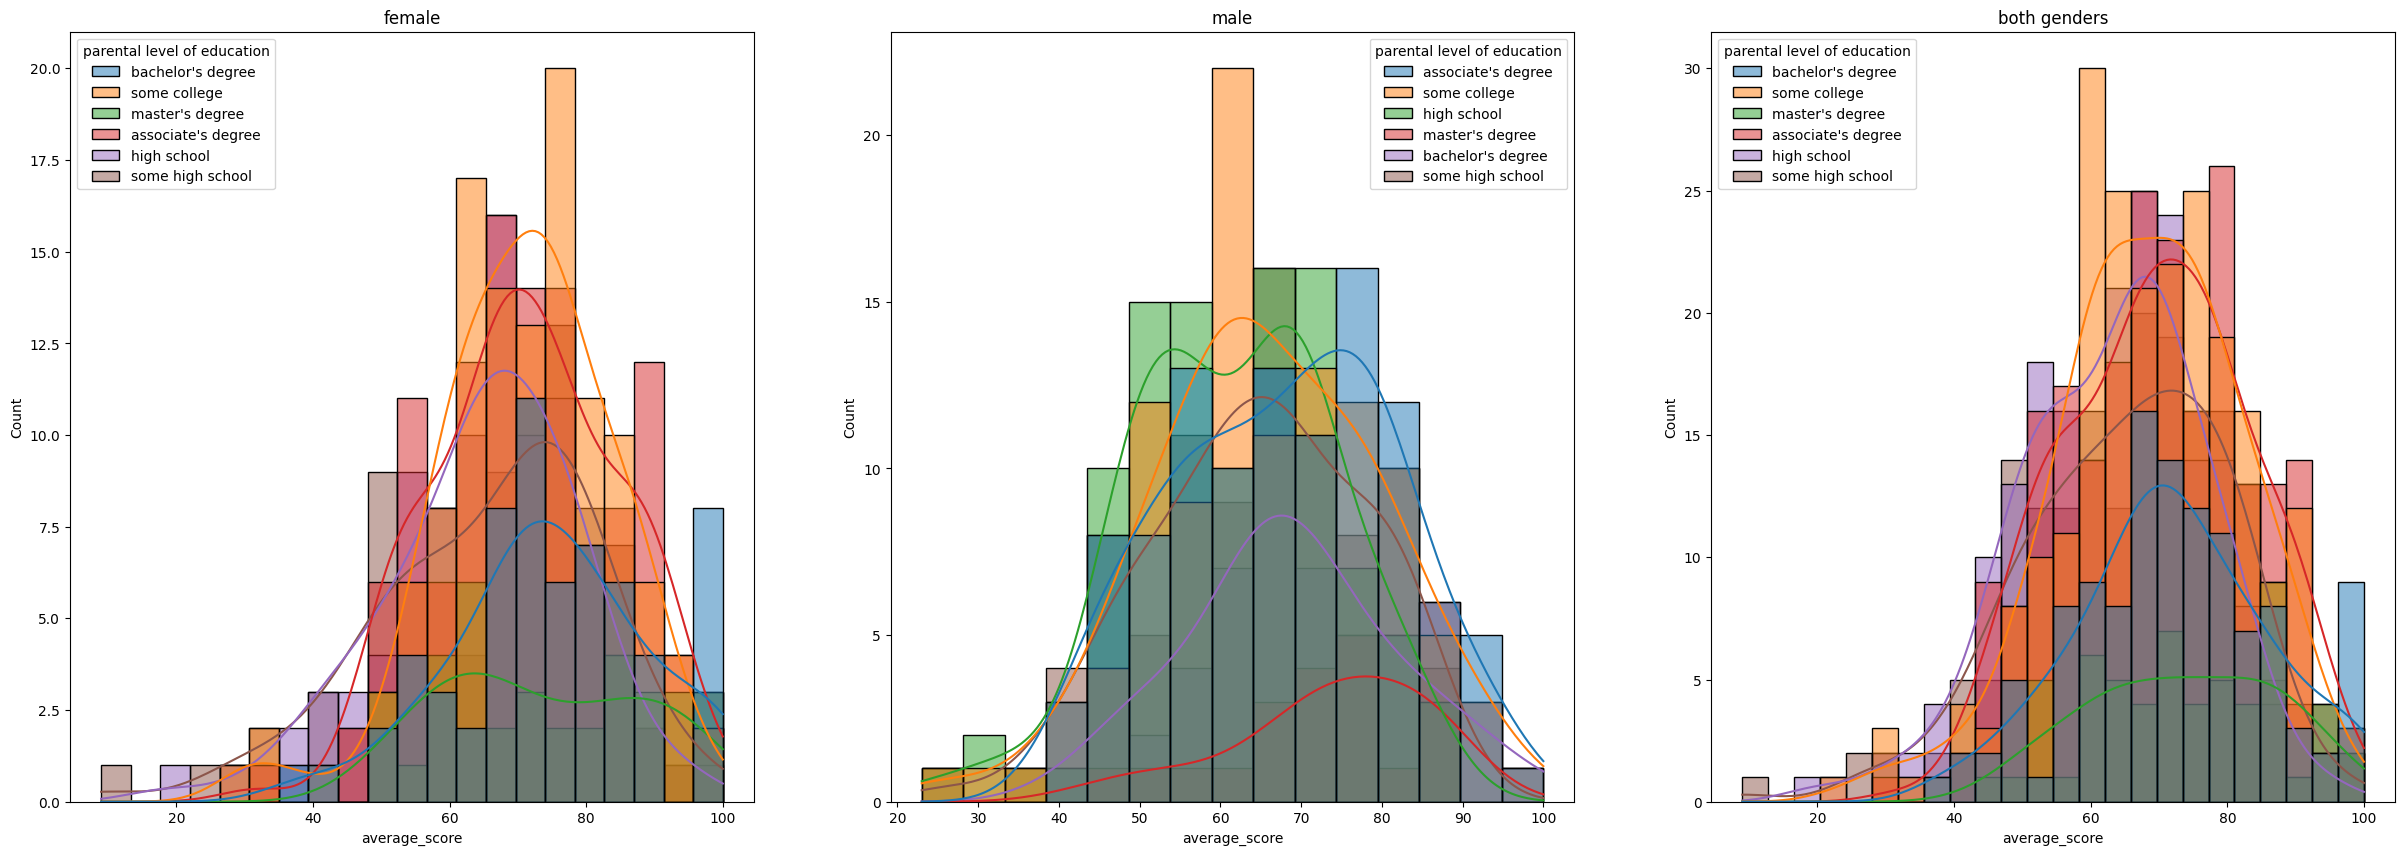

In [121]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, color='blue', hue='parental level of education')
ax[0].set_title('female')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, color='black', hue='parental level of education')
ax[1].set_title('male')
plt.subplot(133)
sns.histplot(data=df, kde=True, color='d', x='average_score', hue='parental level of education')
ax[2].set_title('both genders')
plt.show()

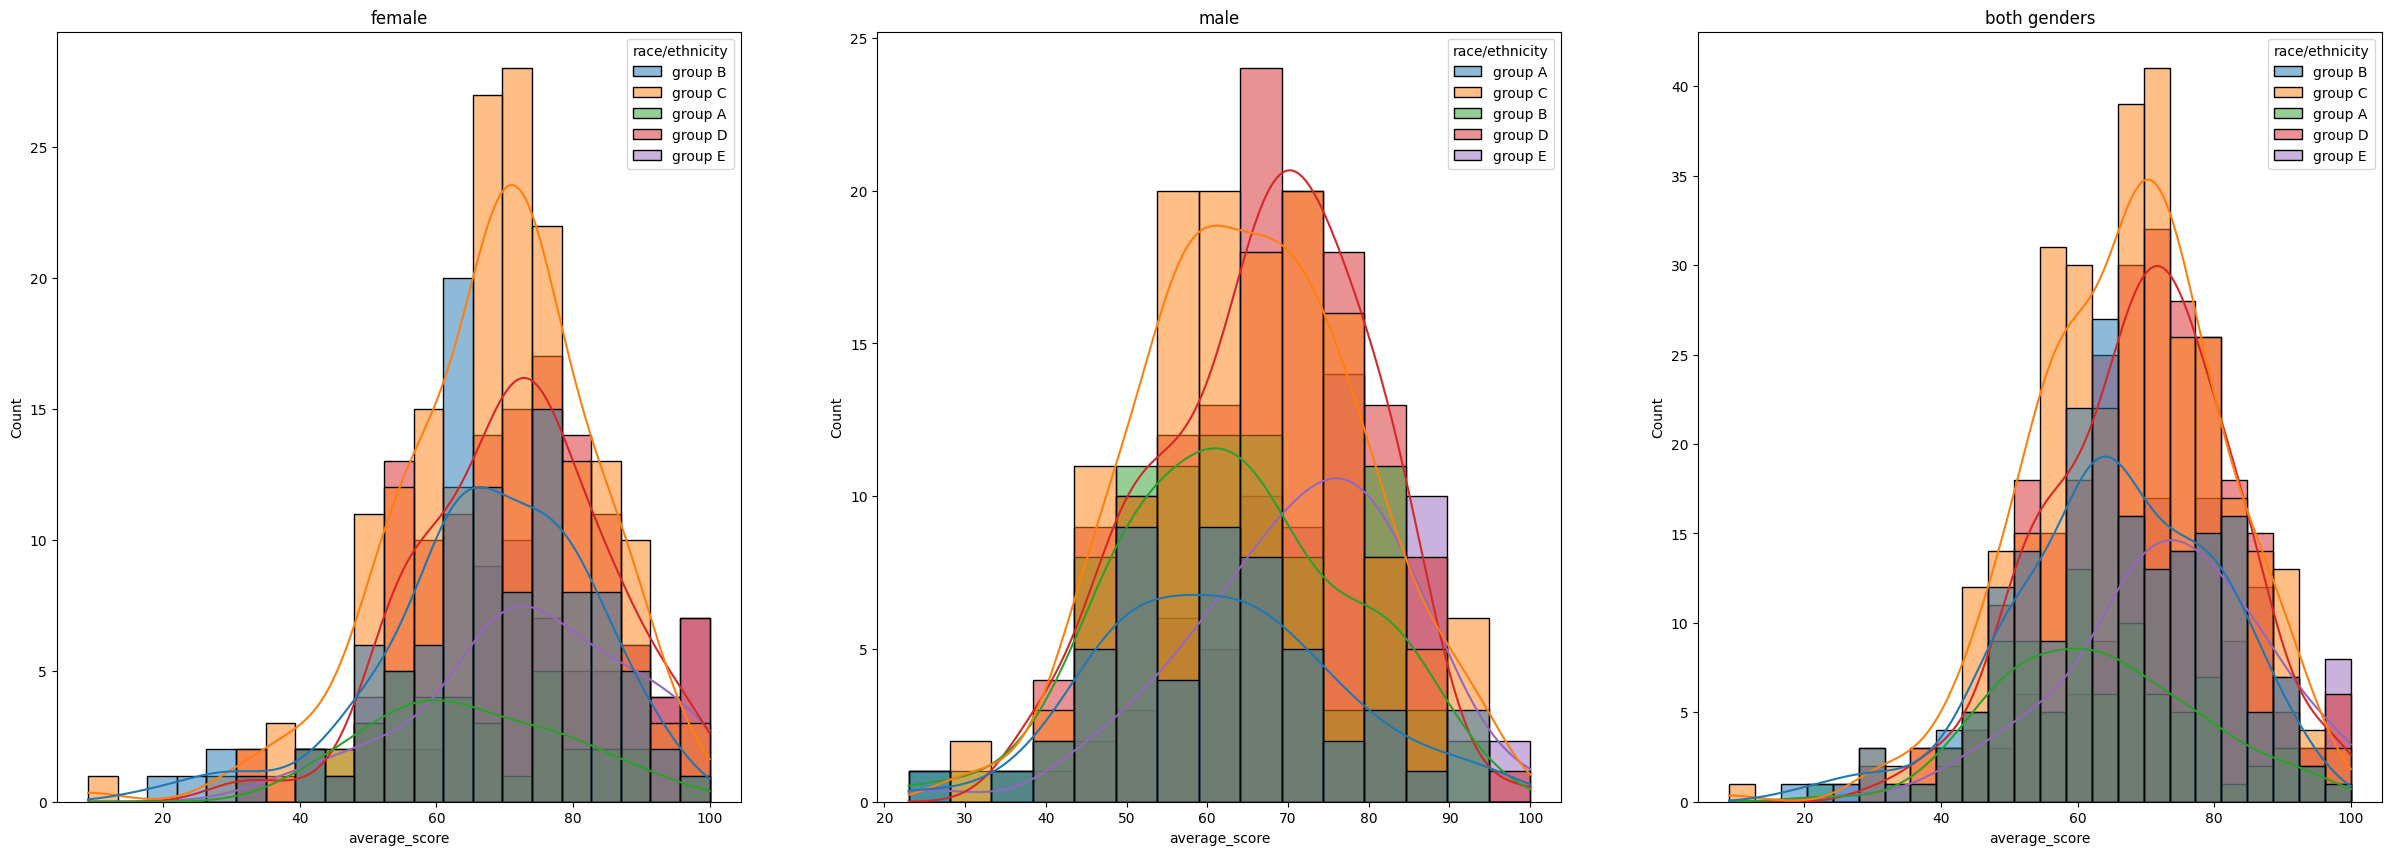

In [122]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, color='blue', hue='race/ethnicity')
ax[0].set_title('female')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, color='black', hue='race/ethnicity')
ax[1].set_title('male')
plt.subplot(133)
sns.histplot(data=df, kde=True, color='d', x='average_score', hue='race/ethnicity')
ax[2].set_title('both genders')
plt.show()

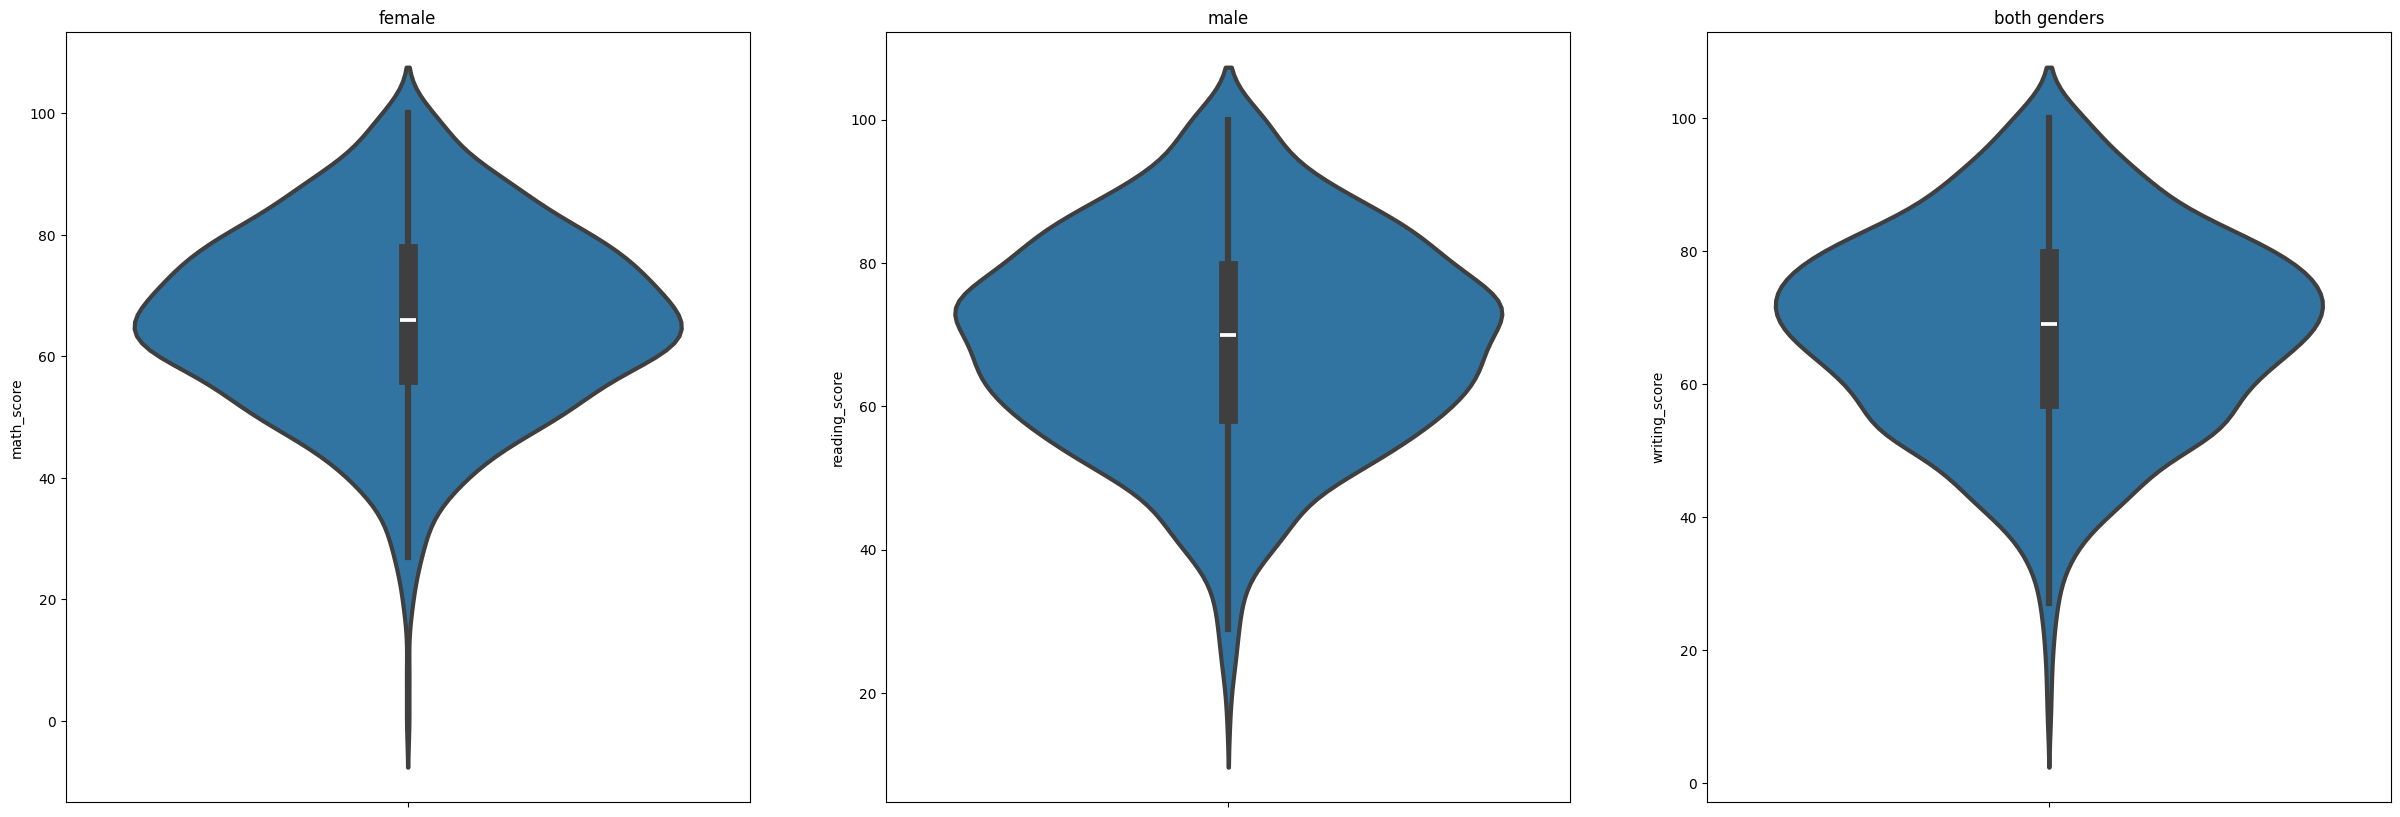

In [129]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
plt.subplot(131)
sns.violinplot(data=df, y='math_score', linewidth=3)
ax[0].set_title('female')

plt.subplot(132)
sns.violinplot(data=df, y='reading_score', linewidth=3)
ax[1].set_title('male')
plt.subplot(133)
sns.violinplot(data=df, y='writing_score', linewidth=3)
ax[2].set_title('both genders')
plt.show()

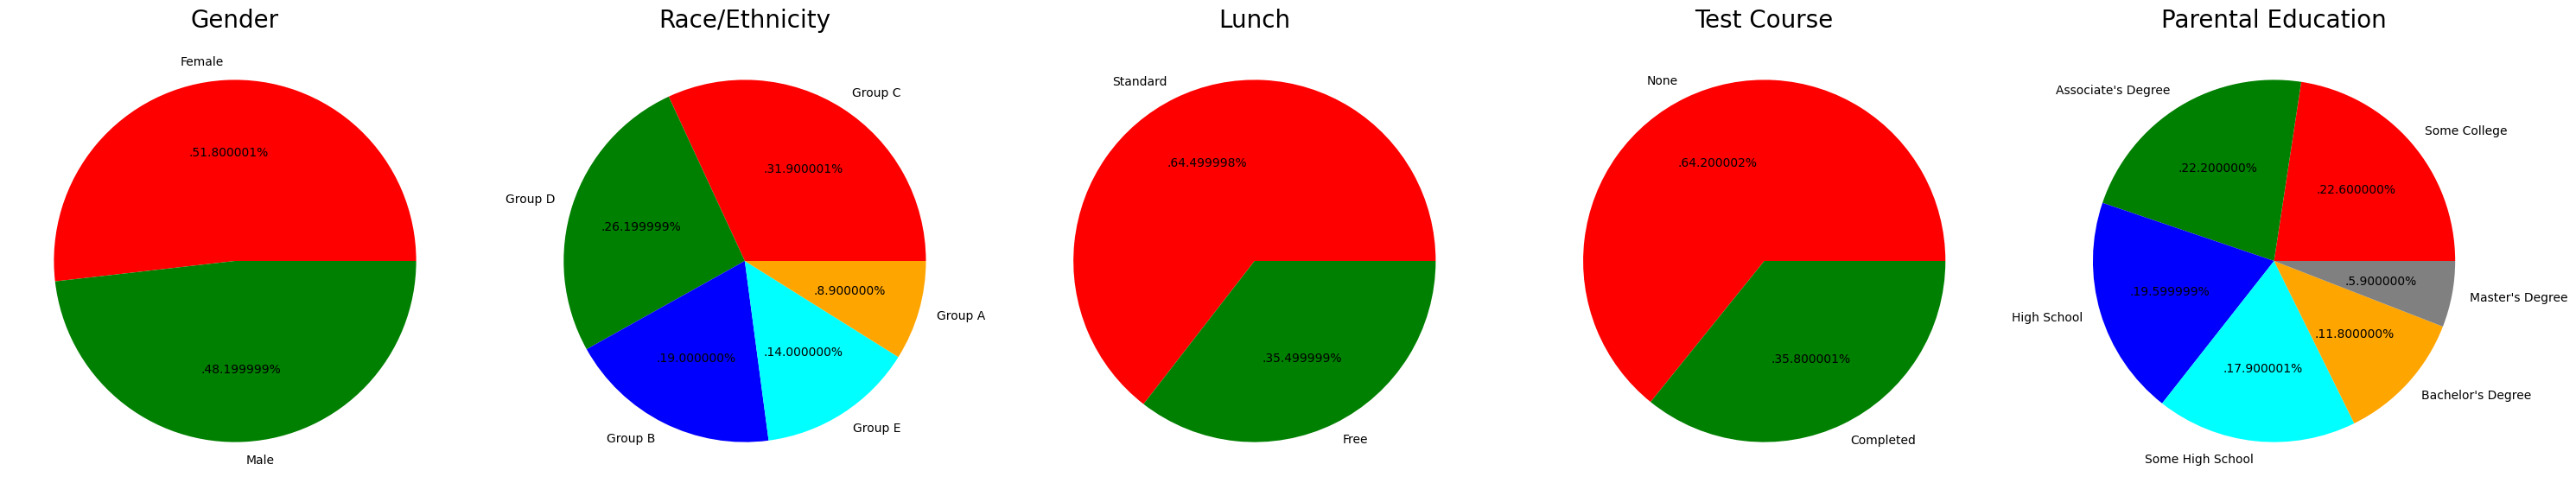

In [130]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

/tmp/ipykernel_8214/422128575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright', saturation=0.95)


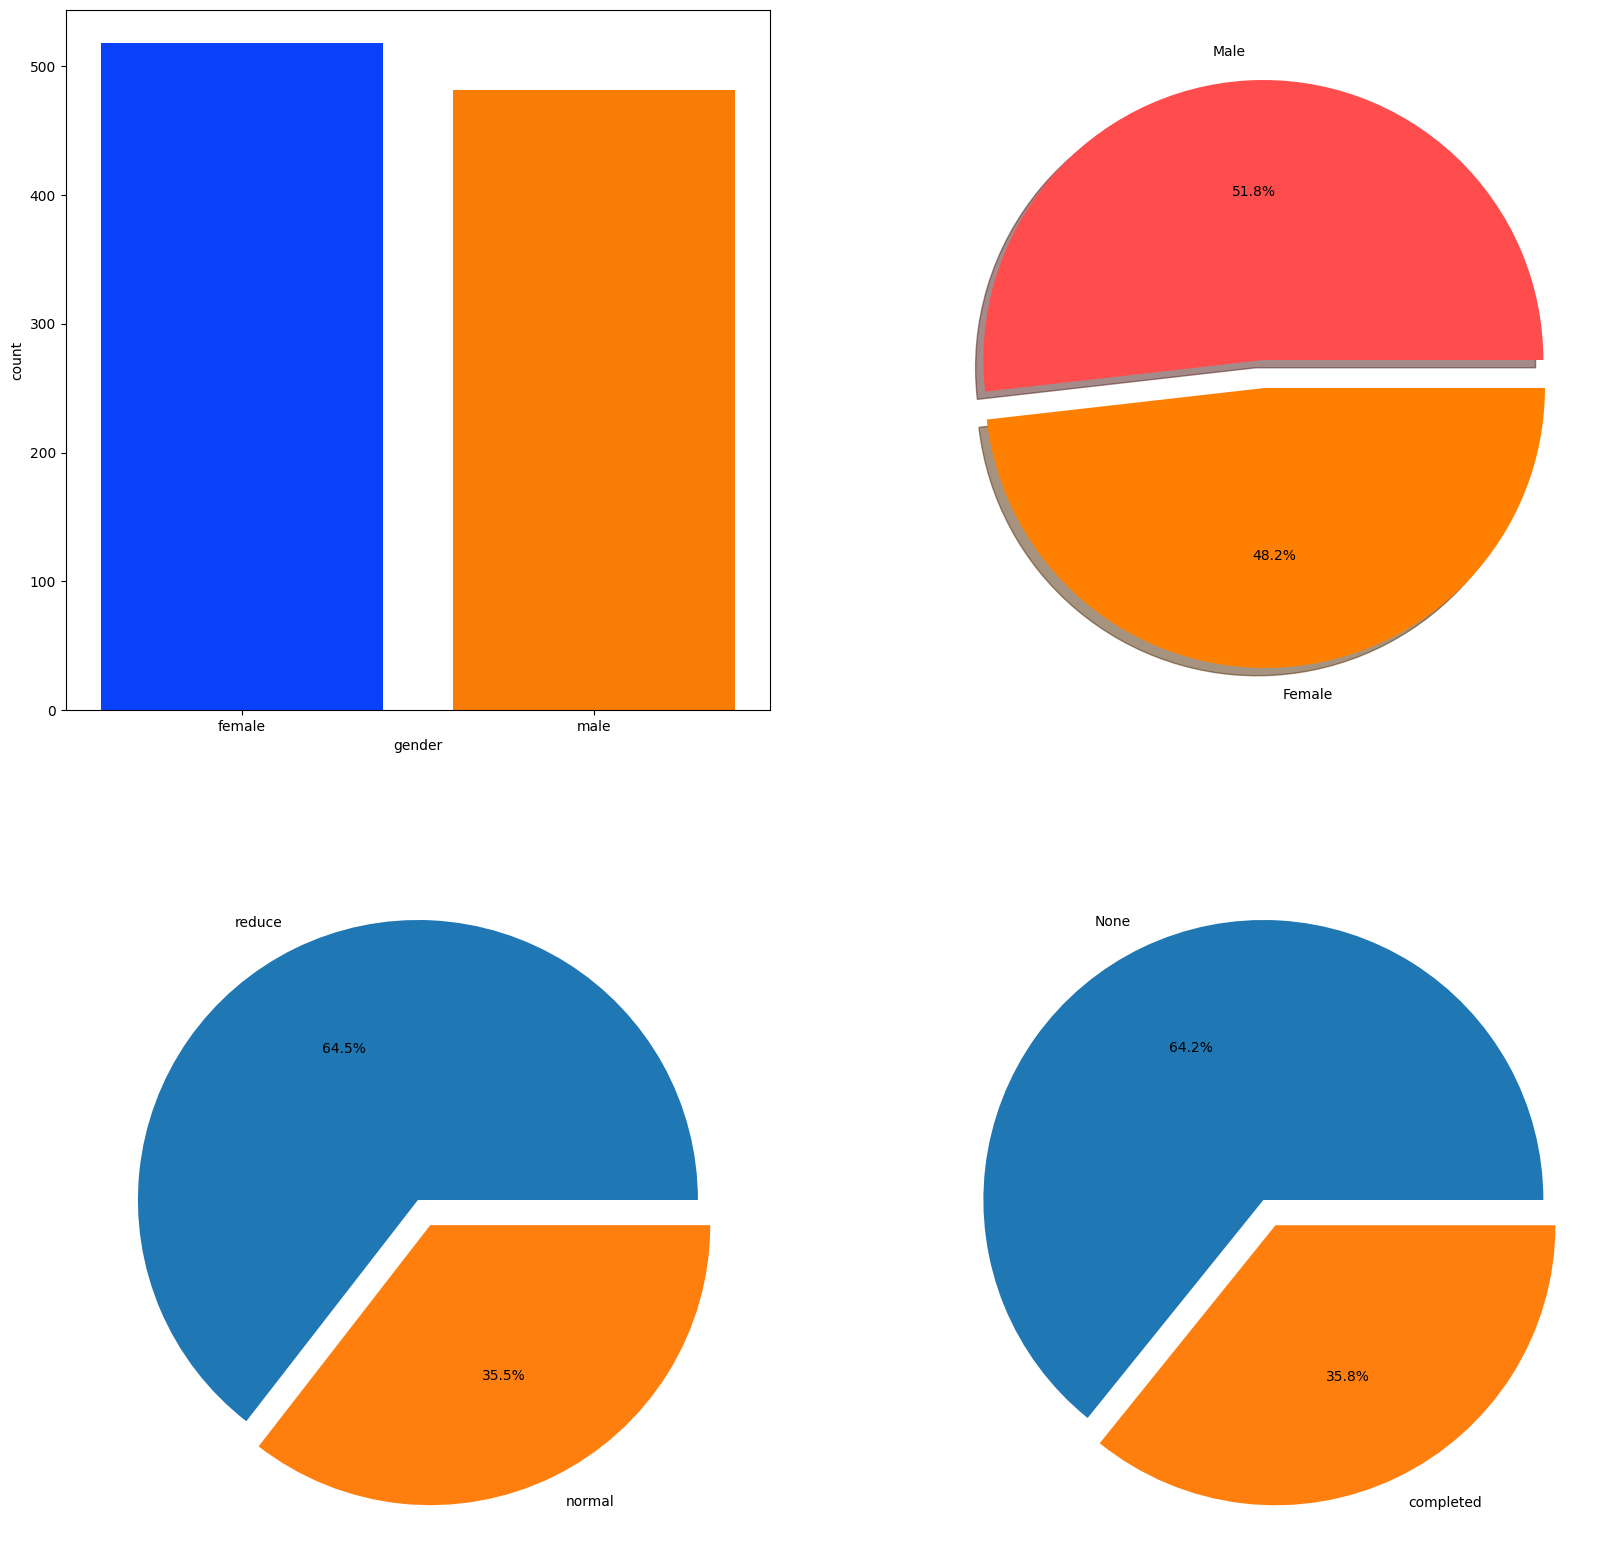

In [137]:
f,ax=plt.subplots(2,2,figsize=(20,20))
plt.subplot(221)
sns.countplot(x=df['gender'],data=df,palette ='bright', saturation=0.95)

plt.subplot(222)    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.subplot(223)
plt.pie(x=df['lunch'].value_counts(), labels=['reduce', 'normal'], explode=(0,0.1), autopct='%1.1f%%')

plt.subplot(224)
plt.pie(x=df['test preparation course'].value_counts(), labels=['None', 'completed'], explode=(0,0.1), autopct='%1.1f%%')

plt.show()

In [165]:
nummerical_columns = df.select_dtypes(include=[np.number]).columns


gender_grouped = df.groupby('gender')[nummerical_columns].mean()
gender_grouped

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


/tmp/ipykernel_8214/533341719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_grouped['average_score'][0], gender_grouped['math_score'][0]]
/tmp/ipykernel_8214/533341719.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_grouped['average_score'][1], gender_grouped['math_score'][1]]


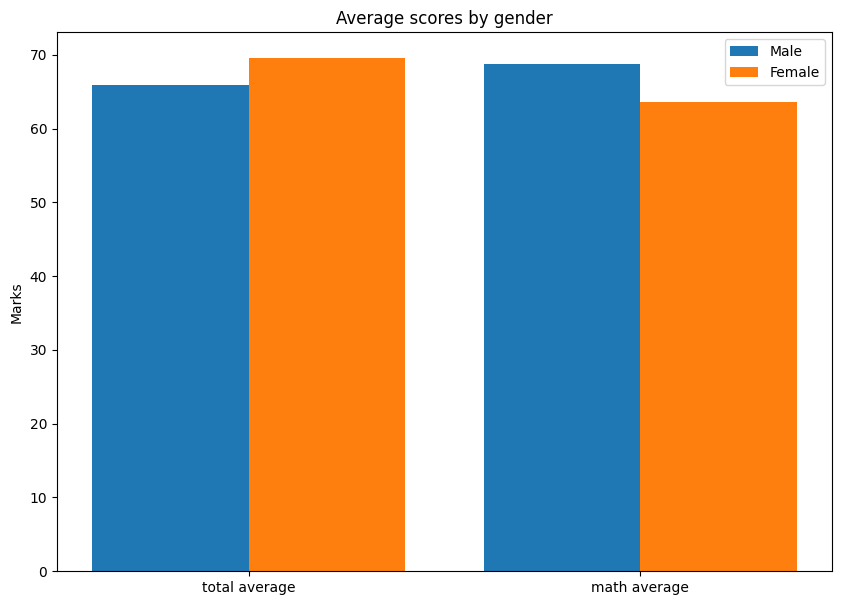

In [167]:

plt.figure(figsize=(10,7))

X = ['total average', 'math average']
female_scores = [gender_grouped['average_score'][0], gender_grouped['math_score'][0]]
male_scores = [gender_grouped['average_score'][1], gender_grouped['math_score'][1]]

x_axis = np.arange(len(X))
plt.bar(x_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(x_axis, X)
plt.ylabel("Marks")
plt.title("Average scores by gender")
plt.legend()

plt.show()

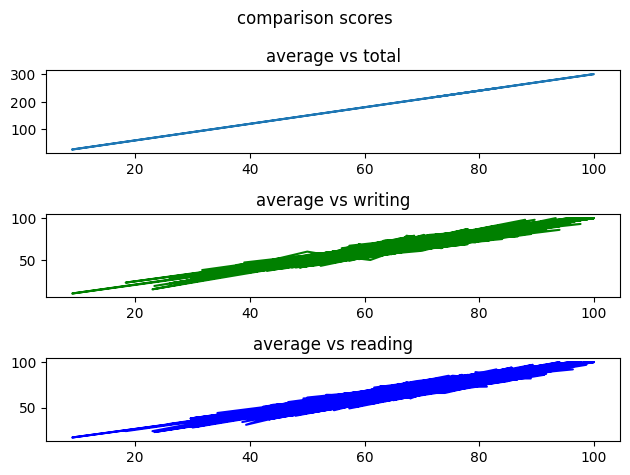

In [95]:
import matplotlib.pyplot as plt
#plt.plot(df['average_score'], df['total_score'], linestyle='--', color='g')
#plt.plot(df['reading_score'], df['writing_score'])
#plt.hist(df['writing_score'], bins=5, edgecolor='black')

# plt.title("first plot of education")
# plt.xlabel("average_score")
# plt.ylabel("total_score")
# plt.grid(True)
# plt.legend()
# plt.show()


fig, axs = plt.subplots(3)

axs[0].plot(df['average_score'], df['total_score'])
axs[0].set_title('average vs total')

axs[1].plot(df['average_score'], df['writing_score'], color='g')
axs[1].set_title('average vs writing')

axs[2].plot(df['average_score'], df['reading_score'], color='b')
axs[2].set_title('average vs reading')

fig.suptitle('comparison scores')

plt.tight_layout()
plt.show()

In [3]:
a = {
    "sina": 1,
    "yas": 2,
    "mom": 4,
}
higher = max(sorted(a.values()))
print(higher)

4


In [4]:
model = [key for key, value in a.items() if value == higher]
print(model)

['mom']
